In [ ]:
import chardet
import pandas as pd

## Начальная предобработка

Переведем txt формат в Датафрейм для обучения модели

In [ ]:
df = pd.read_csv('/content/Balanced_dataset.txt', sep=' ')

In [ ]:
df

,>1|0
0,RRRRRRRGGIYLATALAKWALKQGF
1,>2|0
2,IYLATALAKWALKQGFGGRRRRRRR
3,>3|0
4,RRRRRRRGGKLAKLAKKLAKLAK
...,...
1842,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...
1843,>923|1
1844,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...
1845,>924|1


In [ ]:
import numpy as np

In [ ]:
sp = []
def parse(v):
  if '>' in v:
    sp.append(v[-1])
    return np.nan
  return v
df['>1|0'] = df['>1|0'].apply(parse)

In [ ]:
df = df.dropna()

In [ ]:
df['ans'] = ['0'] + sp

<ipython-input-144-ef8186597870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ans'] = ['0'] + sp


In [ ]:
df

,>1|0,ans
0,RRRRRRRGGIYLATALAKWALKQGF,0
2,IYLATALAKWALKQGFGGRRRRRRR,0
4,RRRRRRRGGKLAKLAKKLAKLAK,0
6,KKALLAHALHLLALLALHLAHALKKA,0
8,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
...,...,...
1838,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1
1840,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1
1842,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1
1844,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1


Воспользуемся библиотекой пептидов для получения дескрипторов последовательностей присутствующих в датасете:

In [ ]:
!pip install peptides

In [ ]:
import peptides

In [ ]:
seqs = df['>1|0']
df_ = pd.DataFrame([ peptides.Peptide(s).descriptors() for s in seqs ])

In [ ]:
df = df.set_index(np.arange(0, len(df)))

In [ ]:
df

,>1|0,ans
0,RRRRRRRGGIYLATALAKWALKQGF,0
1,IYLATALAKWALKQGFGGRRRRRRR,0
2,RRRRRRRGGKLAKLAKKLAKLAK,0
3,KKALLAHALHLLALLALHLAHALKKA,0
4,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
...,...,...
919,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1
920,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1
921,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1
922,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1


In [ ]:
df_['seq'] = df['>1|0']
df_['ans'] = df['ans']

In [ ]:
df_.head(50)

,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,...,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5,seq,ans
0,0.138800,-0.041200,-0.164800,-0.272000,0.374800,0.303200,0.418000,0.090800,0.162800,-0.138400,...,-0.018400,0.624800,-0.138000,0.439200,-0.046800,-1.306400,0.484400,0.114000,RRRRRRRGGIYLATALAKWALKQGF,0
1,0.138800,-0.041200,-0.164800,-0.272000,0.374800,0.303200,0.418000,0.090800,0.162800,-0.138400,...,-0.018400,0.624800,-0.138000,0.439200,-0.046800,-1.306400,0.484400,0.114000,IYLATALAKWALKQGFGGRRRRRRR,0
2,0.447391,-0.247391,-0.380870,-0.429130,0.602609,0.282609,0.494783,0.181739,0.140870,-0.305217,...,0.123043,1.072174,-0.021304,1.144348,0.010435,-1.838261,0.773478,0.368261,RRRRRRRGGKLAKLAKKLAKLAK,0
3,-0.231538,-0.381538,-0.421538,0.042308,0.265385,0.083077,0.379231,0.050000,0.247692,0.115385,...,-0.506923,0.535385,-0.266154,-0.840000,-0.776923,-0.731538,0.509231,0.784615,KKALLAHALHLLALLALHLAHALKKA,0
4,0.094074,-0.197037,0.176667,-0.174074,0.021481,0.351111,0.368148,0.025556,0.246667,-0.062222,...,-0.413333,0.372222,-0.272222,-0.054444,-1.035926,-0.254444,-0.037778,0.260000,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
5,-0.021739,-0.363478,-0.213913,-0.185217,0.305217,0.211304,0.405652,0.090000,0.468696,-0.068261,...,-0.346522,0.490000,-0.258261,-0.144348,-0.670000,-0.880870,0.174348,0.536957,KAFAKLAARLYRKALARQLGVAA,0
6,0.338667,-0.163333,-0.174000,-0.011333,0.464667,0.272000,0.192000,-0.097333,-0.012000,-0.173333,...,0.429333,0.242000,0.110667,1.341333,0.142667,-0.986667,0.095333,-0.070000,GSRVQIRCRFRNSTR,0
7,0.507200,-0.260400,-0.468800,-0.505600,0.561200,0.128400,0.413600,0.129600,0.150800,-0.322800,...,0.118400,0.968800,0.137200,1.016800,0.174000,-1.748800,0.758400,0.492000,KLAKLAKKLAKLAKGRKKRRQRRRP,0
8,0.270833,-0.131250,-0.316250,-0.232917,0.502917,0.180833,0.179167,-0.004583,0.063333,-0.222917,...,0.116667,0.590833,-0.258333,0.489583,0.284167,-0.897500,0.410000,0.423750,KLAKLAKKLAKLAKNYRWRCKNQN,0
9,0.391333,-0.069000,-0.532000,-0.057000,0.213000,-0.127000,0.244000,-0.005667,-0.074667,0.127000,...,0.057667,0.368333,0.314333,0.464000,0.370333,-0.810667,0.507667,0.613667,NHQQQNPHQPPMLLIILRRRIRKQAHAHSK,0


**Получаем дополненный датасет с 80+ дескрипторами для описания последовательностей пептидов и предсказания их CPP-свойств**

In [ ]:
df_

,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,...,VHSE6,VHSE7,VHSE8,Z1,Z2,Z3,Z4,Z5,seq,ans
0,0.138800,-0.041200,-0.164800,-0.272000,0.374800,0.303200,0.418000,0.090800,0.162800,-0.138400,...,-0.018400,0.624800,-0.138000,0.439200,-0.046800,-1.306400,0.484400,0.114000,RRRRRRRGGIYLATALAKWALKQGF,0
1,0.138800,-0.041200,-0.164800,-0.272000,0.374800,0.303200,0.418000,0.090800,0.162800,-0.138400,...,-0.018400,0.624800,-0.138000,0.439200,-0.046800,-1.306400,0.484400,0.114000,IYLATALAKWALKQGFGGRRRRRRR,0
2,0.447391,-0.247391,-0.380870,-0.429130,0.602609,0.282609,0.494783,0.181739,0.140870,-0.305217,...,0.123043,1.072174,-0.021304,1.144348,0.010435,-1.838261,0.773478,0.368261,RRRRRRRGGKLAKLAKKLAKLAK,0
3,-0.231538,-0.381538,-0.421538,0.042308,0.265385,0.083077,0.379231,0.050000,0.247692,0.115385,...,-0.506923,0.535385,-0.266154,-0.840000,-0.776923,-0.731538,0.509231,0.784615,KKALLAHALHLLALLALHLAHALKKA,0
4,0.094074,-0.197037,0.176667,-0.174074,0.021481,0.351111,0.368148,0.025556,0.246667,-0.062222,...,-0.413333,0.372222,-0.272222,-0.054444,-1.035926,-0.254444,-0.037778,0.260000,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.252653,-0.146939,-0.104082,-0.040612,0.065306,0.007347,-0.043469,-0.067959,0.035714,0.090816,...,-0.121020,0.202245,0.077959,0.454082,-0.273061,-0.334286,-0.328367,0.084490,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1
920,-0.095306,0.077551,-0.195510,0.099592,0.095918,-0.065510,-0.129388,0.033265,0.015714,-0.081633,...,0.329388,-0.278163,0.102041,-0.101837,0.509184,0.276327,0.295306,-0.241837,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1
921,0.111731,-0.207500,0.217308,0.002115,0.362500,0.024038,-0.005385,-0.048269,0.072885,-0.009231,...,0.122115,-0.043269,-0.100385,0.592885,-0.319615,0.355192,-0.110385,-0.144038,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1
922,-0.395357,-0.208929,-0.143393,0.185536,0.008571,-0.026429,0.016964,-0.033214,0.099464,-0.105179,...,-0.103214,-0.309464,0.006607,-0.948571,-0.260893,0.304286,0.018214,-0.133929,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1


In [ ]:
columns = 'seq'
dfcorr = df_.drop(columns, axis=1)

Строим корреляционную матрицу для определения подходящих дескрипторов

In [ ]:
corr = dfcorr.corr()
corr.style.background_gradient(cmap='coolwarm')

Определяем корреляцию дескрипторов с таргетной величиной 'ans' для выделения определяющих признаков

In [ ]:
corr_matrix = dfcorr.corr()
print(corr_matrix["ans"].sort_values(ascending=False))

ans        1.000000
E4         0.672970
SVGER9     0.626761
Z3         0.607353
SVGER2     0.569634
             ...   
VHSE5     -0.597042
BLOSUM7   -0.604012
SVGER5    -0.619159
ProtFP4   -0.632785
PP3       -0.641023
Name: ans, Length: 89, dtype: float64


In [ ]:
df_del_descr = corr_matrix[abs(corr_matrix['ans']) <0.5]
df_del_descr['ans'].head(25)

BLOSUM1    -0.263080
BLOSUM2     0.141819
BLOSUM3     0.243219
BLOSUM4     0.439299
BLOSUM5    -0.427213
BLOSUM6    -0.130226
BLOSUM8    -0.166709
BLOSUM9    -0.008499
BLOSUM10    0.425929
PP1        -0.067352
PP2        -0.347673
F1          0.260644
F2         -0.127227
F3         -0.078759
F4         -0.374945
F5         -0.156679
KF1         0.039372
KF2        -0.163832
KF3        -0.232402
KF4        -0.418935
KF5         0.293289
KF6         0.404257
KF7        -0.446855
KF8         0.279184
KF9         0.017902
Name: ans, dtype: float64

In [ ]:
df_del_descr.axes[0].tolist()

['BLOSUM1',
 'BLOSUM2',
 'BLOSUM3',
 'BLOSUM4',
 'BLOSUM5',
 'BLOSUM6',
 'BLOSUM8',
 'BLOSUM9',
 'BLOSUM10',
 'PP1',
 'PP2',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'KF10',
 'MSWHIM1',
 'MSWHIM2',
 'E1',
 'E2',
 'E3',
 'E5',
 'PD1',
 'PD2',
 'ProtFP1',
 'ProtFP2',
 'ProtFP3',
 'ProtFP5',
 'ProtFP6',
 'ProtFP7',
 'ProtFP8',
 'SV1',
 'SV2',
 'SV3',
 'SV4',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'SVGER1',
 'SVGER3',
 'SVGER4',
 'SVGER6',
 'SVGER7',
 'SVGER8',
 'SVGER10',
 'SVGER11',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'VHSE1',
 'VHSE2',
 'VHSE3',
 'VHSE4',
 'VHSE6',
 'VHSE8',
 'Z1',
 'Z2',
 'Z4',
 'Z5']

In [ ]:
columns_to_drop = ['BLOSUM1',
 'BLOSUM2',
 'BLOSUM3',
 'BLOSUM4',
 'BLOSUM5',
 'BLOSUM6',
 'BLOSUM8',
 'BLOSUM9',
 'BLOSUM10',
 'PP1',
 'PP2',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'KF1',
 'KF2',
 'KF3',
 'KF4',
 'KF5',
 'KF6',
 'KF7',
 'KF8',
 'KF9',
 'KF10',
 'MSWHIM1',
 'MSWHIM2',
 'E1',
 'E2',
 'E3',
 'E5',
 'PD1',
 'PD2',
 'ProtFP1',
 'ProtFP2',
 'ProtFP3',
 'ProtFP5',
 'ProtFP6',
 'ProtFP7',
 'ProtFP8',
 'SV1',
 'SV2',
 'SV3',
 'SV4',
 'ST1',
 'ST2',
 'ST3',
 'ST4',
 'ST5',
 'ST6',
 'ST7',
 'ST8',
 'SVGER1',
 'SVGER3',
 'SVGER4',
 'SVGER6',
 'SVGER7',
 'SVGER8',
 'SVGER10',
 'SVGER11',
 'T1','T2','T3','T4','T5','VHSE1',
 'VHSE2','VHSE3','VHSE4','VHSE6',
 'VHSE8','Z1','Z2','Z4','Z5']

df_ = df_.drop(columns=columns_to_drop)
df_.isna().sum()

BLOSUM7    0
PP3        0
F6         0
MSWHIM3    0
E4         0
ProtFP4    0
SVGER2     0
SVGER5     0
SVGER9     0
VHSE5      0
VHSE7      0
Z3         0
seq        0
ans        0
dtype: int64

Получаем датасет для обучения

In [ ]:
df_

,BLOSUM7,PP3,F6,MSWHIM3,E4,ProtFP4,SVGER2,SVGER5,SVGER9,VHSE5,VHSE7,Z3,seq,ans
0,0.418000,0.379200,0.658080,0.023200,-0.147480,0.918400,-1.033904,0.852240,-1.069136,0.605600,0.624800,-1.306400,RRRRRRRGGIYLATALAKWALKQGF,0
1,0.418000,0.379200,0.658080,0.023200,-0.147480,0.918400,-1.033904,0.852240,-1.069136,0.605600,0.624800,-1.306400,IYLATALAKWALKQGFGGRRRRRRR,0
2,0.494783,0.616957,0.903565,0.260000,-0.216174,1.700435,-1.773543,1.161187,-1.435261,0.895217,1.072174,-1.838261,RRRRRRRGGKLAKLAKKLAKLAK,0
3,0.379231,0.213846,-0.034846,-0.280000,-0.124308,1.336154,-0.679646,0.717238,-0.707200,0.421538,0.535385,-0.731538,KKALLAHALHLLALLALHLAHALKKA,0
4,0.368148,0.249630,-0.085963,-0.398148,-0.090111,0.583704,-0.258381,1.039585,-0.894037,0.197037,0.372222,-0.254444,GALFLGFLGAAGSTMGAWSQPKSKRKV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-0.043469,0.020816,0.055510,-0.313265,-0.020816,0.198367,-0.522633,0.014792,0.040251,-0.035714,0.202245,-0.334286,QLEINNIPCKICIIVIGPCWEERTGTTQERPSEAKHDIWYKTNQQGARH,1
920,-0.129388,-0.052653,0.132449,-0.346327,0.049102,-0.258980,0.315863,-0.276633,0.076922,0.013673,-0.278163,0.276327,MFPWDQNCSCFRKRHVFMCKEYRYQVDPRCMHDIYHFSSFWDSMDMVLV,1
921,-0.005385,0.156731,0.123077,-0.340962,0.028654,0.142692,-0.238773,-0.034679,-0.216700,0.066346,-0.043269,0.355192,RCYYNAGSVDACCLKCWQWGASCWNQLRLPCKGVSPNCCNSTARER...,1
922,0.016964,-0.061786,0.010804,-0.383214,0.019536,0.034107,0.688234,0.126438,0.010889,0.025357,-0.309464,0.304286,HRYCVCFYFYAFMGTMTKFLMVAPTFEFCLNLAIFPNLFMHMSVDC...,1


**Выбираем CatBoost для обучения классификатора**

In [ ]:
!pip install catboost
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df_.drop(columns=['seq', 'ans'])
y = df_['ans']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

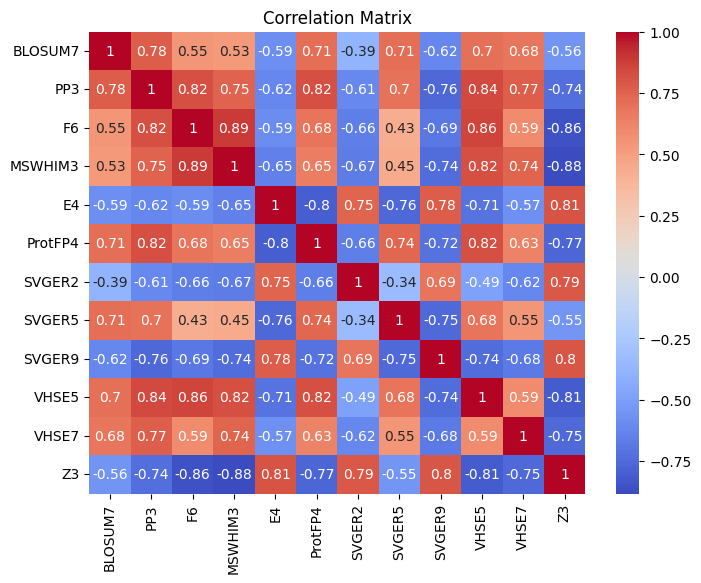

In [ ]:

# Calculate the correlation matrix for the features in X_train
correlation_matrix = np.corrcoef(X_train, rowvar=False)

# Create a heatmap to visualize the correlation matrix, annotating values, and using the 'coolwarm' color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=X.keys(), yticklabels=X.keys())

# Set the title for the plot
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [ ]:
# Создаем и тренируем the CatBoostClassifier
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.1,
   loss_function='MultiClass', verbose=False)
model.fit(X_train, y_train)

**Получаем предсказания к тестовой выборке и рассчитываем метрики:**

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9081081081081082
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        98
           1       0.90      0.91      0.90        87

    accuracy                           0.91       185
   macro avg       0.91      0.91      0.91       185
weighted avg       0.91      0.91      0.91       185



**Смотрим вклад дескрипторов в определение CPP-последовательностей пептидов**

In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

E4         17.311581
MSWHIM3    14.247238
SVGER5      9.903727
BLOSUM7     8.415112
SVGER9      8.026910
SVGER2      7.569179
VHSE7       7.190564
VHSE5       6.927325
Z3          5.352870
PP3         5.094023
ProtFP4     5.030950
F6          4.930522
dtype: float64

<ipython-input-188-2db4982cb273>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index, fontsize = 10)


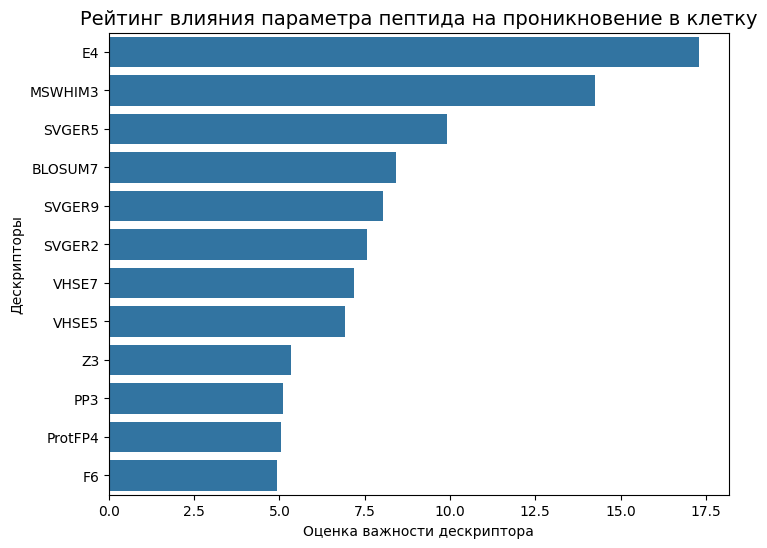

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Рейтинг влияния параметра пептида на проникновение в клетку", fontsize = 14)
ax.set_yticklabels(feature_scores.index, fontsize = 10)
ax.set_xlabel("Оценка важности дескриптора", fontsize = 10)
ax.set_ylabel("Дескрипторы", fontsize = 10)
plt.show()